## Electricity consumption prediction
Goal is to predict energy use for different cases

### Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 
<br><br>
<ul>
<li>Date time year-month-day hour:minute:second</li>
<li>Appliances, energy use in Wh </li>
<li>lights, energy use of light fixtures in the house in Wh </li>
<li>T1, Temperature in kitchen area, in Celsius </li>
<li>RH_1, Humidity in kitchen area, in % </li>
<li>T2, Temperature in living room area, in Celsius </li>
<li>RH_2, Humidity in living room area, in % </li>
<li>T3, Temperature in laundry room area </li>
<li>RH_3, Humidity in laundry room area, in % </li>
<li>T4, Temperature in office room, in Celsius </li>
<li>RH_4, Humidity in office room, in % </li>
<li>T5, Temperature in bathroom, in Celsius </li>
<li>RH_5, Humidity in bathroom, in % </li>
<li>T6, Temperature outside the building (north side), in Celsius </li>
<li>RH_6, Humidity outside the building (north side), in % </li>
<li>T7, Temperature in ironing room , in Celsius </li>
<li>RH_7, Humidity in ironing room, in % </li>
<li>T8, Temperature in teenager room 2, in Celsius </li>
<li>RH_8, Humidity in teenager room 2, in % </li>
<li>T9, Temperature in parents room, in Celsius </li>
<li>RH_9, Humidity in parents room, in % </li>
<li>To, Temperature outside (from Chievres weather station), in Celsius </li>
<li>Pressure (from Chievres weather station), in mm Hg </li>
<li>RH_out, Humidity outside (from Chievres weather station), in % </li>
<li>Wind speed (from Chievres weather station), in m/s </li>
<li>Visibility (from Chievres weather station), in km </li>
<li>Tdewpoint (from Chievres weather station), in °C </li>
<li>rv1, Random variable 1, nondimensional </li>
<li>rv2, Random variable 2, nondimensional </li>
</ul>
<strong>Target variable</strong> - Appliences - energy use 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Load the dataset
data = pd.read_csv('energydata_complete.csv')

In [54]:
#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

In [55]:
data.head()

,DATE,APPLIANCES,LIGHTS,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_OUT,PRESS_MM_HG,RH_OUT,WINDSPEED,VISIBILITY,TDEWPOINT,RV1,RV2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [56]:
data_clean = data.dropna()

In [57]:
predvar = data_clean[['LIGHTS', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_OUT', 'PRESS_MM_HG', 'RH_OUT', 'WINDSPEED',
       'VISIBILITY', 'TDEWPOINT']]

target = data_clean.APPLIANCES

In [58]:
predictors = predvar.copy()
from sklearn import preprocessing
for column in predictors.columns.tolist():
    predictors[column] = preprocessing.scale(predictors[column].astype('float64'))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, 
                                                    test_size=.3, random_state=69)

In [60]:
model = LassoLarsCV(cv=10, precompute=False).fit(X_train, y_train)

In [61]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'LIGHTS': 15.900721427183766,
 'PRESS_MM_HG': 1.1941003948254261,
 'RH_1': 58.80384515228657,
 'RH_2': -52.294957747006855,
 'RH_3': 17.460743792379279,
 'RH_4': -2.7191125246865746,
 'RH_5': 2.2064928821255867,
 'RH_6': 10.044060916888689,
 'RH_7': -8.1042771848342863,
 'RH_8': -24.919714671627801,
 'RH_9': -3.3554814684070413,
 'RH_OUT': -18.442175194959344,
 'T1': -2.8306701068849769,
 'T2': -36.911619218488703,
 'T3': 51.929679869219662,
 'T4': -8.1754529121954,
 'T5': -0.23594824392726857,
 'T6': 42.984041598145495,
 'T7': 5.1578255800822284,
 'T8': 16.746360196425002,
 'T9': -32.738102678648715,
 'TDEWPOINT': 22.488234187900609,
 'T_OUT': -55.257376593354159,
 'VISIBILITY': 1.6362287423386039,
 'WINDSPEED': 3.563642085749775}

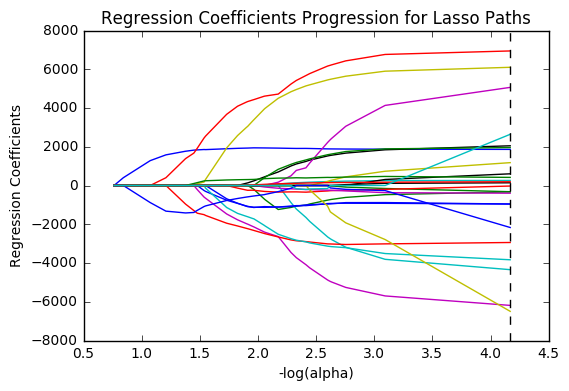

In [62]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

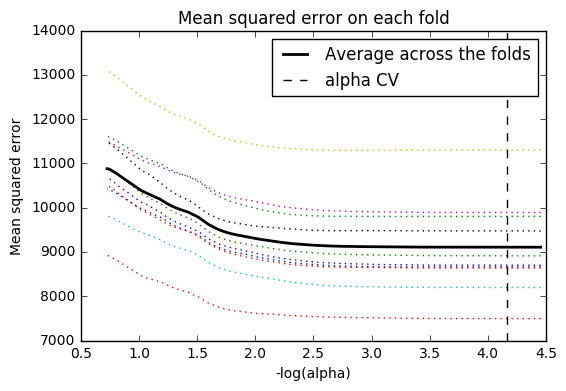

In [63]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

In [64]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
9065.84914506
test data MSE
8118.20942731


In [65]:
# R-square from training and test data
rsquared_train = model.score(X_train, y_train)
rsquared_test = model.score(X_test, y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.166608100328
test data R-square
0.158727326651


A lasso regression analysis was conducted to identify a subset of variables from a pool of 25 numeroc predictive variables  that best predicted quantitive response variable measuring electrical usage. Most variables represent temperature, humidity, wind speed and other parameters of air.

Data were randomly split into a training set that included 70% of the observations (N=13814) and a test set that included 30% of the observations (N=5921). The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.

All variables were retained in the selected model. Features with most weight is Temperature outside, Humidity in kitchen area, Humidity in living room area, Temperature in laundry room area